## Exam 2 (Due April 21, 2021 at 11:59 pm)

Please read each question carefully and apply the necessary exploratory analysis to each data set, as well as test for the assumptions relevant to each method when appropriate.

Write the answers in the space provided below each question.

### $1$. Small sample sizes reduces the power of a one tail t-test because the tails in the t distribution are similiar than those in a normal distribution?

a. True

b. False

**False**, the power of a one-tail t-test is reduced by the fact that at low sample sizes the tails of its distribution are **not** similar to the normal distribution. At small sample sizes the tails of a t distribution are larger than those of the normal distribution and as the sample size increases the tails decrease, becoming increasingly more similar to the normal distribution (example below). 

In [1]:
norm_dist2sd = pnorm(-2)*2
t_dist2sd_8df = pt(-2,5)*2
t_dist2sd_80df = pt(-2,50)*2
t_dist2sd_800df = pt(-2,500)*2

cat(sprintf("The probability of being further than 2 standard deviations away from the mean in either direction:"))
cat(sprintf("\n\n normal distribution: %0.4f",norm_dist2sd))
cat(sprintf("\n\n t-distribution at sample size 6: %0.4f",t_dist2sd_8df))
cat(sprintf("\n\n t-distribution at sample size 51: %0.4f",t_dist2sd_80df))
cat(sprintf("\n\n t-distribution at sample size 501: %0.4f",t_dist2sd_800df))

The probability of being further than 2 standard deviations away from the mean in either direction:

 normal distribution: 0.0455

 t-distribution at sample size 6: 0.1019

 t-distribution at sample size 51: 0.0509

 t-distribution at sample size 501: 0.0460

### $2$. Data on 102 male and 100 female athletes were collected at the Australian Institute of Sport. The data are  in the file ais.txt.

Develop a logistic regression model for gender ( y = 1 corresponds to female) or ( y = 0 corresponds to male) based on the following predictors (which is a subset of those available):

- RCC, read cell count
- WCC, white cell count
- BMI, body mass index
 
Remember to check for the model assumptions.

Loading required package: ggplot2

Loading required package: carData



,Sex,Ht,Wt,LBM,RCC,WCC,Hc,Hg,Ferr,BMI,SSF,Bfat,Label,Sport
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,1,195.9,78.9,63.32,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,f-b_ball,b_ball
2,1,189.7,74.4,58.55,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,f-b_ball,b_ball
3,1,177.8,69.1,55.36,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,f-b_ball,b_ball
4,1,185.0,74.9,57.18,4.11,5.3,37.3,12.6,69,21.88,126.4,23.66,f-b_ball,b_ball
5,1,184.6,64.6,53.20,4.45,6.8,41.5,14.0,29,18.96,80.3,17.64,f-b_ball,b_ball
6,1,174.0,63.7,53.77,4.10,4.4,37.4,12.5,42,21.04,75.2,15.58,f-b_ball,b_ball


The response variable is binary - 1 = Female and 0 = Male

The minimum sample size needed to meet assumptions is 60.6 while the actual sample size is 202

Boxplots show there is at least 1 outlier for each explanatory variable and this should be noted

`geom_smooth()` using formula 'y ~ x'



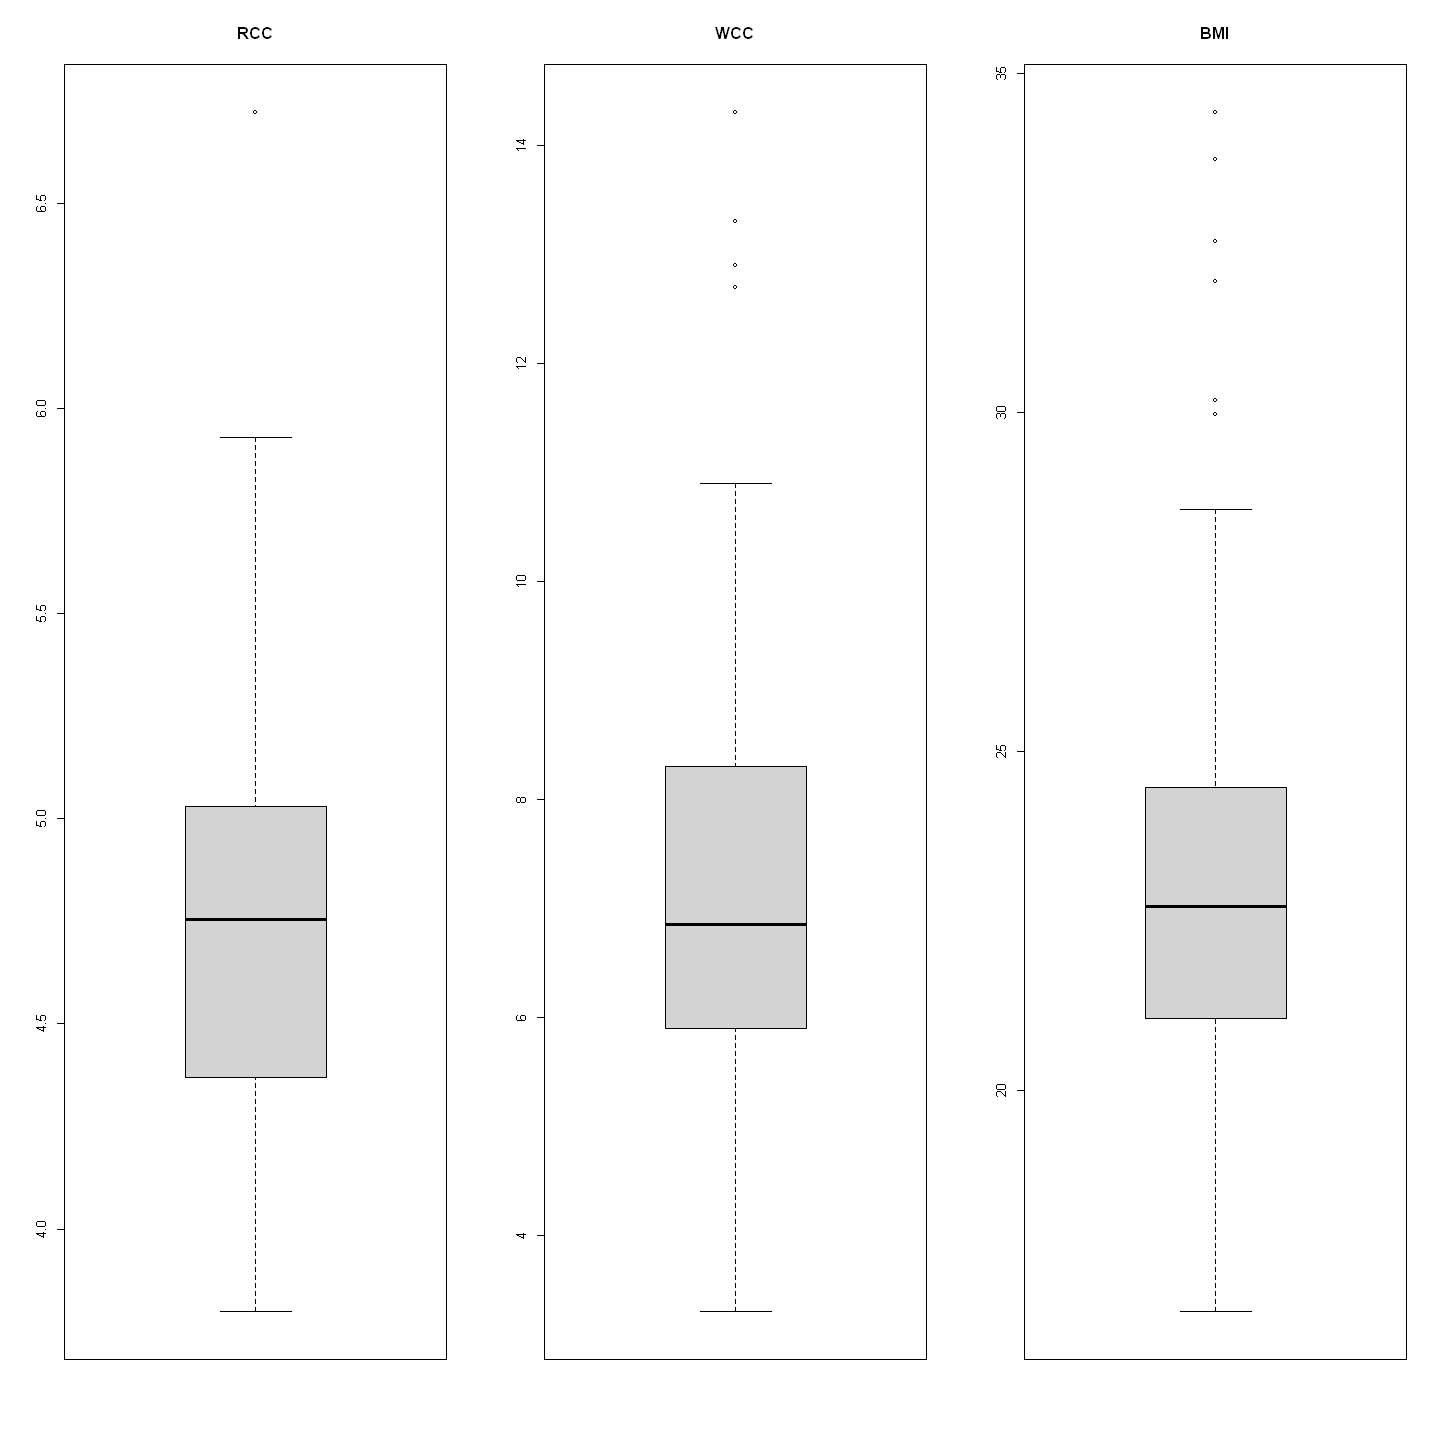

`geom_smooth()` using formula 'y ~ x'



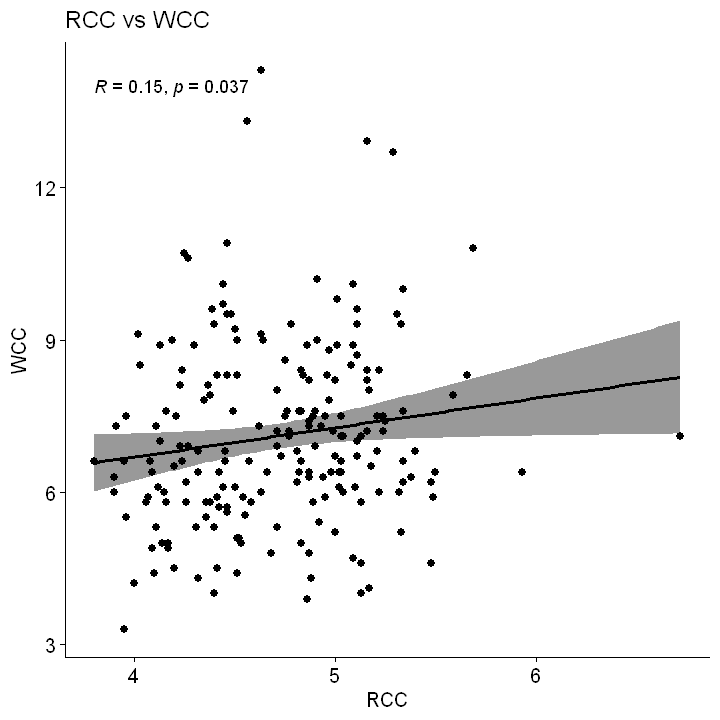

`geom_smooth()` using formula 'y ~ x'



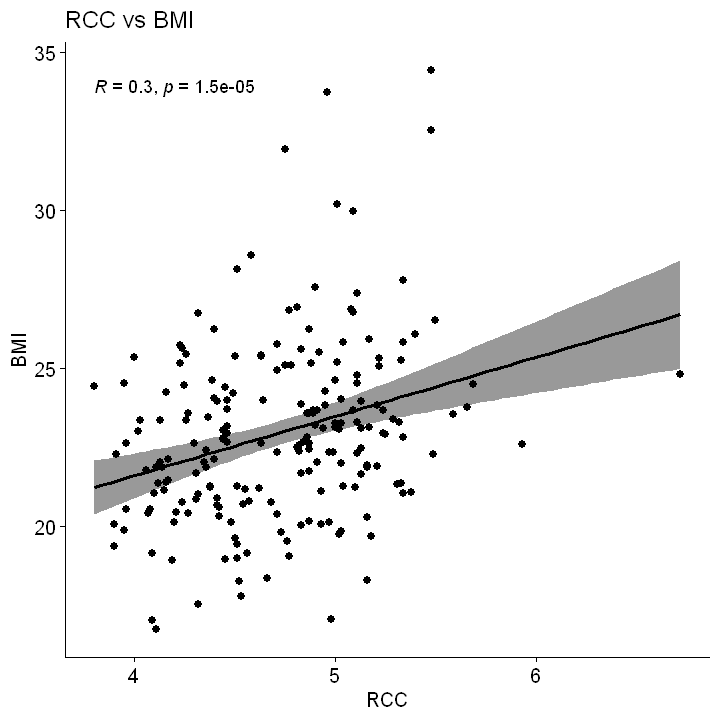

There is no severe correlation between predictor variables with the largest R^2 being 0.09

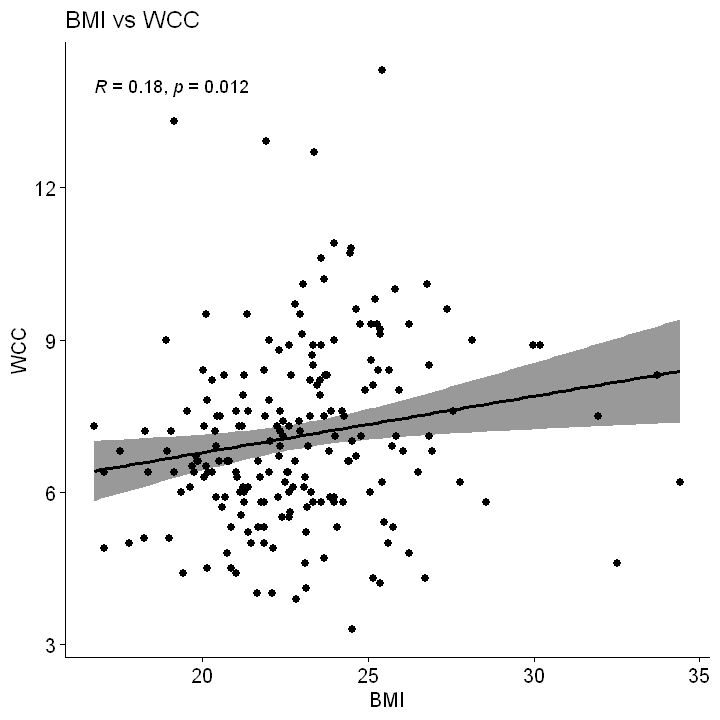

In [2]:
library(ggpubr)
library(car)
athletes = read.table("ais.txt",header = TRUE)
head(athletes)
# check assumptions
# The response variable is binary
cat(sprintf("The response variable is binary - 1 = Female and 0 = Male"))
# check sample size is large enough
smallest_freq = 100/202
num_expl = 3
min_samp = (10*num_expl)/smallest_freq
cat(sprintf("\n\nThe minimum sample size needed to meet assumptions is %.1f while the actual sample size is 202",min_samp))
# check for outliers 
options(repr.plot.width = 12, repr.plot.height = 12)
par(mfrow = c(1,3))
boxplot(athletes$RCC,main = "RCC")
boxplot(athletes$WCC,main = "WCC")
boxplot(athletes$BMI,main = "BMI")
cat(sprintf("\n\nBoxplots show there is at least 1 outlier for each explanatory variable and this should be noted"))
# There should not be severe collinearity among explanatory variables
options(repr.plot.width = 6, repr.plot.height = 6)
ggscatter(athletes, x = "RCC", y = "WCC",add = "reg.line",conf.int = TRUE, cor.coef = TRUE, cor.method = "pearson",
          main = "RCC vs WCC", xlab = "RCC", ylab = "WCC")
ggscatter(athletes, x = "RCC", y = "BMI",add = "reg.line",conf.int = TRUE, cor.coef = TRUE, cor.method = "pearson",
          main = "RCC vs BMI", xlab = "RCC", ylab = "BMI")
ggscatter(athletes, x = "BMI", y = "WCC",add = "reg.line",conf.int = TRUE, cor.coef = TRUE, cor.method = "pearson",
          main = "BMI vs WCC", xlab = "BMI", ylab = "WCC")
cat(sprintf("There is no severe correlation between predictor variables with the largest R^2 being 0.09"))

The examples above show that there is no substantial correlation between predictor variables, the response variable is binary, and the sample size of 202 is greater than the mininum needed of 61 and outliers have been accounted for so a logistic regression model should be appropriate.

In [45]:
# Developing the logistic regression model 
library(broom)
logistic_model_gender = glm(Sex ~ RCC+WCC+BMI,family = "binomial",data = athletes)
summary(logistic_model_gender)
# testing logistic model
gender_prob = predict(logistic_model_gender, newx = athletes,type = "response")
gender_prediction = ifelse(gender_prob >= 0.5,1,0)
model_table = table(pred = gender_prediction,true = athletes$Sex)

correct_predictions = model_table[1,1] + model_table[2,2]
percent_correct = (correct_predictions/202)*100

# re-evaluating some of the assumptions needed
cat(sprintf("\nData points with highest Cook score - most likely to be outliers:\n"))
model_data = augment(logistic_model_gender) %>% mutate(index = 1:n())
model_data %>% top_n(3,.cooksd)

cat(sprintf("\n\nUsing VIF of the model's explanatory variables to confirm the assumption of no-multicollinearity:\n"))
vif(logistic_model_gender)

cat(sprintf("The logistic regression model was able to make %.0f correct predictions for an accuracy of %.1f percent",
            correct_predictions,percent_correct))


Call:
glm(formula = Sex ~ RCC + WCC + BMI, family = "binomial", data = athletes)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.56012  -0.52459  -0.02467   0.52242   2.67643  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) 29.29399    3.92411   7.465 8.32e-14 ***
RCC         -5.34706    0.72118  -7.414 1.22e-13 ***
WCC          0.15505    0.12190   1.272  0.20338    
BMI         -0.22911    0.08723  -2.626  0.00863 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 280.01  on 201  degrees of freedom
Residual deviance: 147.01  on 198  degrees of freedom
AIC: 155.01

Number of Fisher Scoring iterations: 5



Data points with highest Cook score - most likely to be outliers:


Sex,RCC,WCC,BMI,.fitted,.resid,.std.resid,.hat,.sigma,.cooksd,index
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,5.33,9.3,25.27,-3.5534109,2.676429,2.687408,0.008154391,0.8423751,0.07238859,74
1,4.75,7.5,31.93,-2.2570702,2.170993,2.236780,0.057957840,0.8490346,0.15600721,75
0,4.63,14.3,25.43,0.9281342,-1.588230,-1.731167,0.158316817,0.8550109,0.14133617,194




Using VIF of the model's explanatory variables to confirm the assumption of no-multicollinearity:


RCC      WCC      BMI 
1.030720 1.081198 1.054115

The logistic regression model was able to make 171 correct predictions for an accuracy of 84.7 percent

Generation of the model allowed further confirmation that the assumptions made for a logistic regression are valid: standardized residuals of less than 3 on the samples most likely to be troublesome outliers demonstrates that they are not substantial outliers and VIF of the explanatory variables had values hovering right near 1 which indicates no substantial multicollinearity. The mode was able to predict gender of the athletes with an accuracy of 84.7%.

### $3$. If scores are normally distributed with a mean of 42 and a standard deviation of 8, what percent of the scores is: 

(a) greater than 25? 

(b) smaller than 31? 

(c) between 25 and 31?

In [11]:
mean3 = 42
std3 = 8
# a) greater than 25
pGreater25 = 1 - pnorm(25,mean3,std3)
# b) less than 31
pSmaller31 = pnorm(31,mean3,std3)
# c) between 25 and 31
pBetween25and31 = pGreater25+pSmaller31 - 1

cat(sprintf("Given a normal distribution with mean 42 and standard deviation 8:"))
cat(sprintf("\n\na) percentage of scores greater than 25 = %.2f percent",pGreater25*100))
cat(sprintf("\n\nb) percentage of scores less than 31 = %.2f percent",pSmaller31*100))
cat(sprintf("\n\nc) percentage of scores between 25 and 31 = %.2f percent",pBetween25and31*100))

Given a normal distribution with mean 42 and standard deviation 8:

a) percentage of scores greater than 25 = 98.32 percent

b) percentage of scores less than 31 = 8.46 percent

c) percentage of scores between 25 and 31 = 6.78 percent

### $4$. From the following table:
![title](table1.png)

a. Apply the appropiate tests to evaluate the null hypothesis that there is no difference in the noise values means at different vehicle sizes. 

b. Examine all assumptions related to the test and make sure that the data follows all of those assumptions.

Shapiro-Wilk test to check for approximate normality:


	Shapiro-Wilk normality test

data:  small
W = 0.81799, p-value = 0.08479



	Shapiro-Wilk normality test

data:  medium
W = 0.83114, p-value = 0.1099



	Shapiro-Wilk normality test

data:  large
W = 0.84829, p-value = 0.1525




Levene Tests to determine if approximate equivariance is met: 

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,2,3.5,0.05656064
,15,NA,NA




ANOVA testing to determine if a distance between means exists: 


            Df Sum Sq Mean Sq F value   Pr(>F)    
Size         2  15703    7851   70.49 2.36e-08 ***
Residuals   15   1671     111                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



Using TukeyHSD at a corrected alpha of 0.05/3 = 0.017

  Tukey multiple comparisons of means
    98.3% family-wise confidence level

Fit: aov(formula = Noise ~ Size, data = data4)

$Size
                  diff       lwr         upr     p adj
medium-large  70.00000  50.78731 89.21268661 0.0000000
small-large   50.83333  31.62065 70.04601995 0.0000015
small-medium -19.16667 -38.37935  0.04601995 0.0172562


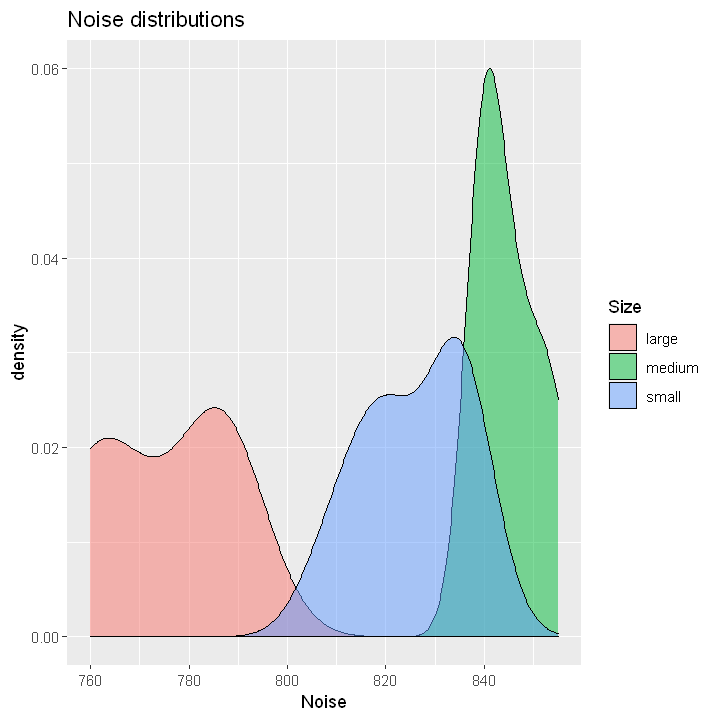

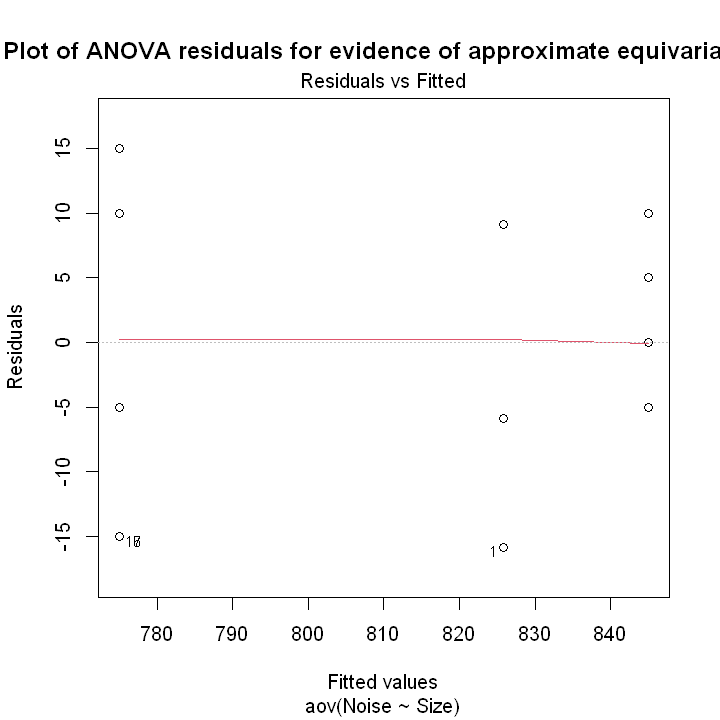

In [6]:
# Use ANOVA and then pairwise t-tests
small = c(810,820,820,835,835,835)
medium = c(840,840,840,845,855,850)
large = c(785,790,785,760,760,770)
small_mean = mean(small)
med_mean = mean(medium)
large_mean = mean(large)

data4 = data.frame(matrix(0,nrow=18,ncol=2))
colnames(data4) = c("Size","Noise")
data4$Size[1:6] = "small"
data4$Size[7:12] = "medium"
data4$Size[13:18] = "large"
data4$Size = as.factor(data4$Size)
data4$Noise[1:6] = small
data4$Noise[7:12] = medium
data4$Noise[13:18] = large
# looking at distributions
cat(sprintf("Shapiro-Wilk test to check for approximate normality:"))
ggplot(data4, aes(x = Noise, fill = Size)) + geom_density(alpha = 0.5) + ggtitle("Noise distributions")
shapiro.test(small)
shapiro.test(medium)
shapiro.test(large)
# check for equivariance between groups
cat(sprintf("\n\nLevene Tests to determine if approximate equivariance is met: "))
leveneTest(Noise~Size, data = data4)
# perform ANOVA to determine if difference between means exists
cat(sprintf("\n\nANOVA testing to determine if a distance between means exists: \n"))
noise_anova = aov(Noise~Size, data = data4)
summary(noise_anova)
# perform TukeyHSD paired t-tests to determine where difference exists
cat(sprintf("\n\nUsing TukeyHSD at a corrected alpha of 0.05/3 = 0.017"))
TukeyHSD(noise_anova,conf.level = 1-0.017)
plot(noise_anova,1,main = "Plot of ANOVA residuals for evidence of approximate equivariance")

Tests and visualizations showed the groups to be approximately normal with no Shapiro-Wilk test returning a signficant p-value. A Levene test was used to determine if the groups were equivariant/shared a common variance and returned a non-signficant p-value of 0.152 indicating that the assumption of common variance and normality were both met for using ANOVA. ANOVA produced a p-value of 2.3e-8 indicating with high significance that the means of the three vehicles sizes were not the same. Further analysis using the TukeyHSD pairwise tests with an alpha of 0.017 (0.05 corrected for 3 tests) showed that while medium and large sized vehicles had different average noise levels and small and larger were also different, small and medium vehicle sound levels were not significantly different.

### $5$. From the BABNEW.dta dataset use the appropiate statistical test to evaluate difference in birth weight (bweight)  as a function of gender (sex). 

Solve the exercise manually using the steps given in lecture and then confirm the results with the R function.


,id,matage,ht,gestwks,sex,bweight,matagegp,gestcat
,<dbl>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>
1,1,33,no,37.74,female,2410,2,2
2,2,34,no,39.15,female,2977,2,2
3,3,34,no,35.72,female,2100,2,1
4,4,30,no,39.29,male,3270,2,2
5,5,35,no,38.38,female,2620,3,2
6,6,37,no,37.86,male,3260,3,2


Evaluating normality of the male and female distributions:
Kurtosis: 4.623 and 5.072
Skewness: -0.887 and -1.151
Shapiro-Wilk p-value: 7.987e-09 and 2.664e-11
Given the high n, 641, the U score can be assumed to act as if drawn from a normal distribution allowing it to
be translated into a z-score: 
U score = 42916.5
into Z score = 3.60
leads to pvalue = 3.231e-04

This manually derived p-value matches that from both the base Mann-Whitney U test in R: 3.234e-04 and that from the
coin packakge of 3.231e-04

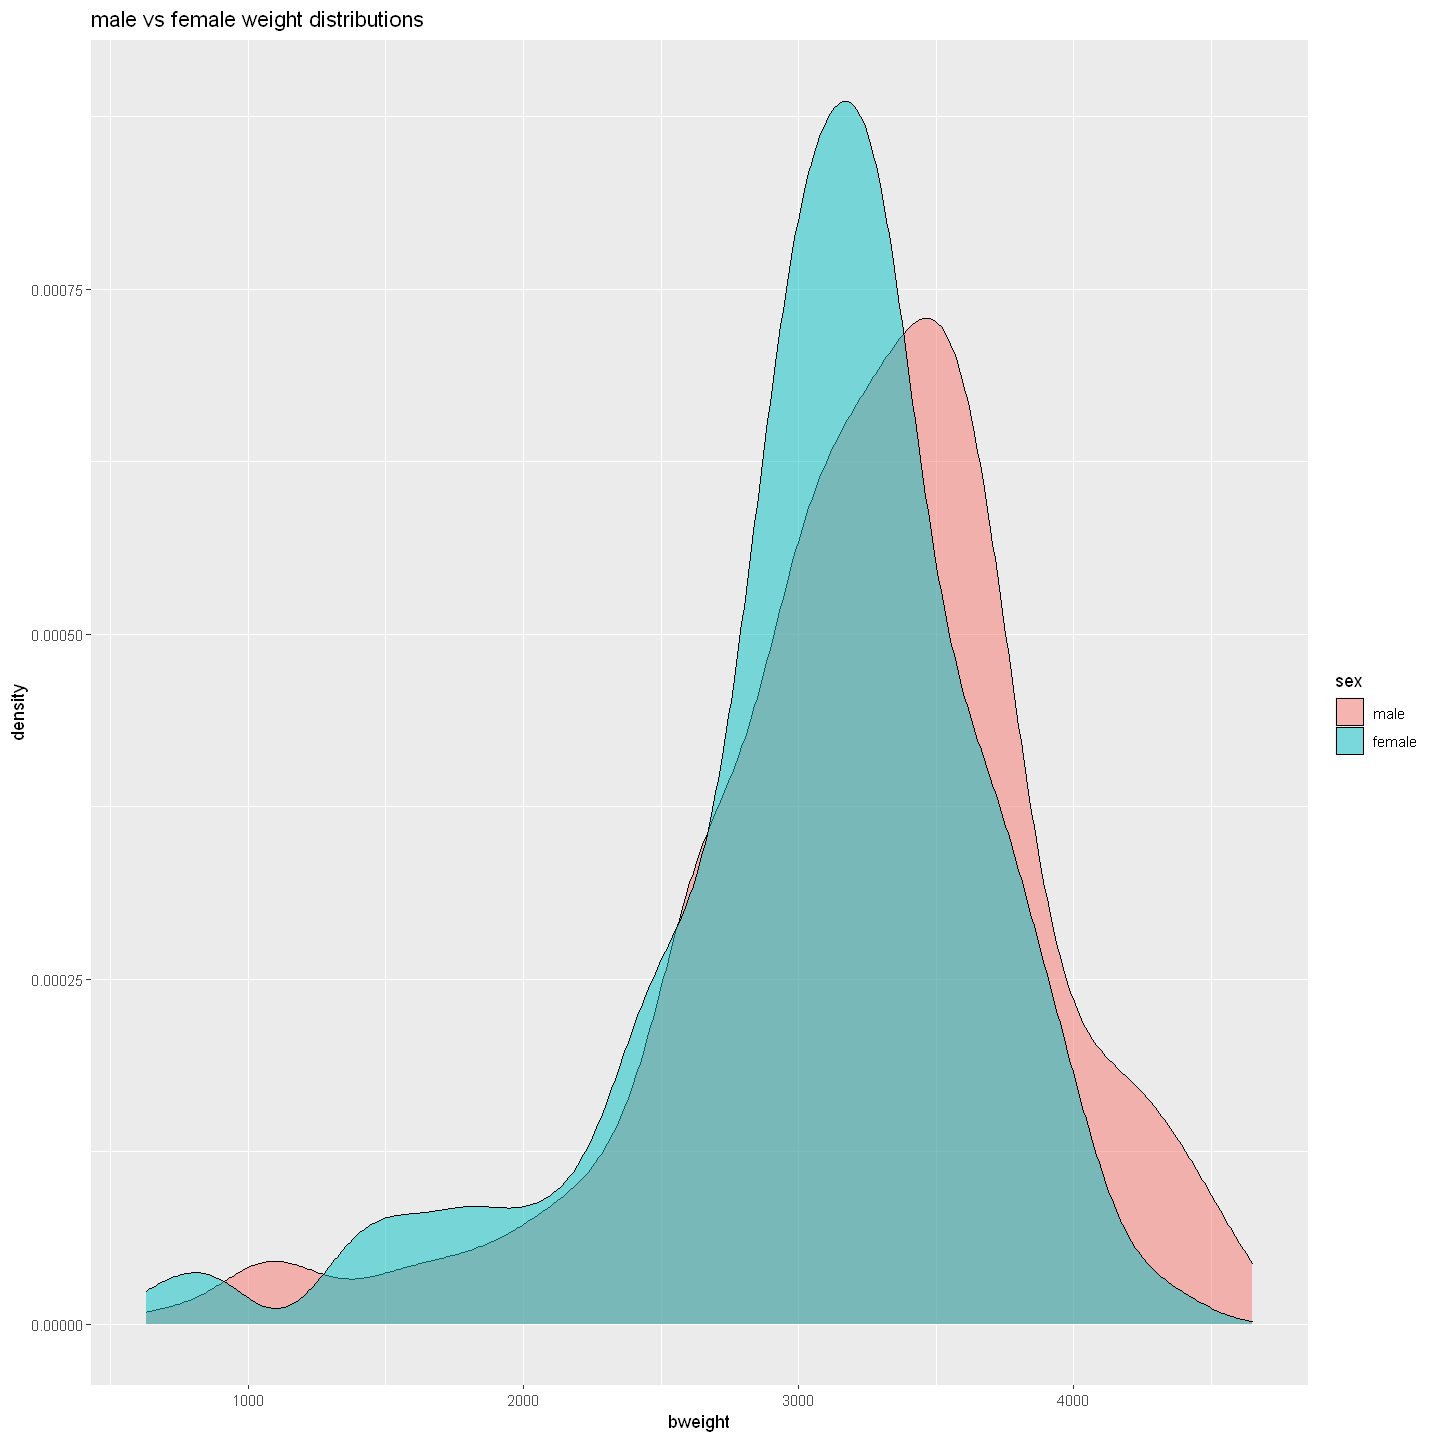

In [40]:
library(foreign)
library(tidyverse)
library(dplyr)
babnew <- read.dta("./BABNEW.dta", convert.factors = T)
library(magrittr)
library(moments)
library("coin")
head(babnew)
# checking for normality of the distributions
male_weights = babnew$bweight[babnew$sex=="male"]
female_weights = babnew$bweight[babnew$sex=="female"]
m_skew = skewness(male_weights)
f_skew = skewness(female_weights)
m_kurt = kurtosis(male_weights)
f_kurt = kurtosis(female_weights)
m_p = shapiro.test(male_weights)$p.value
f_p = shapiro.test(female_weights)$p.value
cat(sprintf("Evaluating normality of the male and female distributions:"))
cat(sprintf("\nKurtosis: %.3f and %.3f",m_kurt,f_kurt))
cat(sprintf("\nSkewness: %.3f and %.3f",m_skew,f_skew))
cat(sprintf("\nShapiro-Wilk p-value: %1.3e and %1.3e",m_p,f_p))
ggplot(babnew, aes(x = bweight, fill = sex)) + geom_density(alpha = 0.5) + ggtitle("male vs female weight distributions")
# applying a non-parametric test because the distributions are not normal and transforms do not make normal
# mann-whitney U test - uses median rather than mean as null hypothesis 
nf = length(female_weights)
nm = length(male_weights)
birthweight_sort = babnew[order(babnew$bweight),]
birthweight_sort$weight_ranked = rank(birthweight_sort$bweight,ties.method="average")
sort_f = filter(birthweight_sort,sex == "female")
sort_m = filter(birthweight_sort,sex == "male")
Rf = sum(sort_f$weight_ranked)
Rm = sum(sort_m$weight_ranked)
Uf <- Rf - (nf*(nf+1))/2
Um <- Rm - (nm*(nm+1))/2
Utest = min(Uf,Um)
meanU = nf*nm/2
sdU1 = (nf*nm*(nf+nm+1))/12
rank_counts = count(birthweight_sort,vars = weight_ranked)
n = nf+nm
sdU2 = 1-sum((rank_counts$n^3-rank_counts$n)/(n^3 -n))
sigmaU = sqrt(sdU1*sdU2)
z_test = (abs(Utest-meanU))/sigmaU
p_value_U = (1-pnorm(z_test))*2


# using the r-function for mann-whitney U test
MW_weight = wilcox.test(bweight~sex,data = babnew)
coin_MW = wilcox_test(bweight~sex,data = babnew)

cat(sprintf("\nGiven the high n, %.0f, the U score can be assumed to act as if drawn from a normal distribution allowing it to
be translated into a z-score: ",n))
cat(sprintf("\nU score = %.1f",Utest))
cat(sprintf("\ninto Z score = %.2f",z_test))
cat(sprintf("\nleads to pvalue = %1.3e",p_value_U))
cat(sprintf("\n\nThis manually derived p-value matches that from both the base Mann-Whitney U test in R: %1.3e and that from the
coin packakge of 3.231e-04",MW_weight$p.value))

The distributions of birthweights for both male and female babies showed evidence of non-normal distributions with skew of -0.887 and -1.151 combined with kurtosis of 4.62 and 5.07 respectively. This indicated a skew of the distribution towards the right and a sharper peak of the distribution, which was also seen when plotted. Shapiro-Wilk test's agreed with this evidence with highly signficant p-values under all data transformations indicating non-normal distributions. Because the distributions were non-normal it was decided to use a non-parametric test rather than a t-test, using the analogous Mann-Whitney U test. With over 600 samples we were able to assume the U score manually calculated would be approximately normally distributed allowing conversion into a Z-score and then into a p-value of 3.23e-4. This p-value agreed with those provided by both the R wilcox.test() and coin::wilcox_test p-values indicating that the null hypothesis, that the medians of the two distributions is the same, is to be rejected, indicating the median birthweight between males and females is signficantly different. 

### $6$. The following data reports the calorie content of beef hot dogs. Here are the numbers of calories of a random sample of 20 different hot dogs:

186, 181, 176, 149, 184, 190, 158, 139, 175, 148, 152, 111, 141, 153, 190, 157, 131, 149, 135, 132.

Assume that these numbers are the observed values from a random sample of twenty independent normal random variables with mean μ and variance σ2, both unknown. Find the 90% confidence intervals for the mean number of calories μ.

$(\bar{x} - t_{n-1,1_{-\alpha/2}}s/\sqrt{n},\bar{x} + t_{n-1,1_{-\alpha/2}}s/\sqrt{n}) $

In [44]:
rand_calories = c(186,181,176,149,184,190,158,139,175,148,152,111,141,153,190,157,131,149,135,132)
n = 20
x_bar = mean(rand_calories)
s = sd(rand_calories)
alpha = 0.1
t_score = qt(1-(alpha/2),df = n-1)
CIl= x_bar-(t_score*(s/sqrt(n)))
CIh = x_bar+(t_score*(s/sqrt(n)))
cat(sprintf("The 90 percent confidence interval for the average number of calories in a beef hotdog is: [%.1f,%.1f]",CIl,CIh))
cat(sprintf("\nor %.1f +/- %.2f calories",x_bar,t_score*(s/sqrt(n))))

The 90 percent confidence interval for the average number of calories in a beef hotdog is: [148.1,165.6]
or 156.8 +/- 8.75 calories

### $7$. Which type of predictor variables can be included in a General Linear Model

a. Logistic

b. Normal

c. Categorical

d. continuous

e. Mixed


GLM models can make use of both continuous and categorical variable types or a mix of the two.

### $8$. The file anscombe.txt contains 4 different datasets constructed by Anscombe in 1973. The x and y variables are matched to each dataset respectively (e.g. x1 corresponds to y1, etc). 

A. Produce a Simple linear regression for each dataset (a scatterplot might also help you to see the differences). 

B. Write the resulting linear function for each model. 

C. Generate residuals plots 

D. In a few sentences discuss each model and what might be the problem (if any) with that model and what can be done to fix it.

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),3.0000909,1.1247468,2.667348,0.025734051
x1,0.5000909,0.1179055,4.241455,0.002169629


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),3.000909,1.1253024,2.666758,0.025758941
x2,0.500000,0.1179637,4.238590,0.002178816


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),3.0024545,1.1244812,2.670080,0.025619109
x3,0.4997273,0.1178777,4.239372,0.002176305


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),3.0017273,1.1239211,2.670763,0.025590425
x4,0.4999091,0.1178189,4.243028,0.002164602


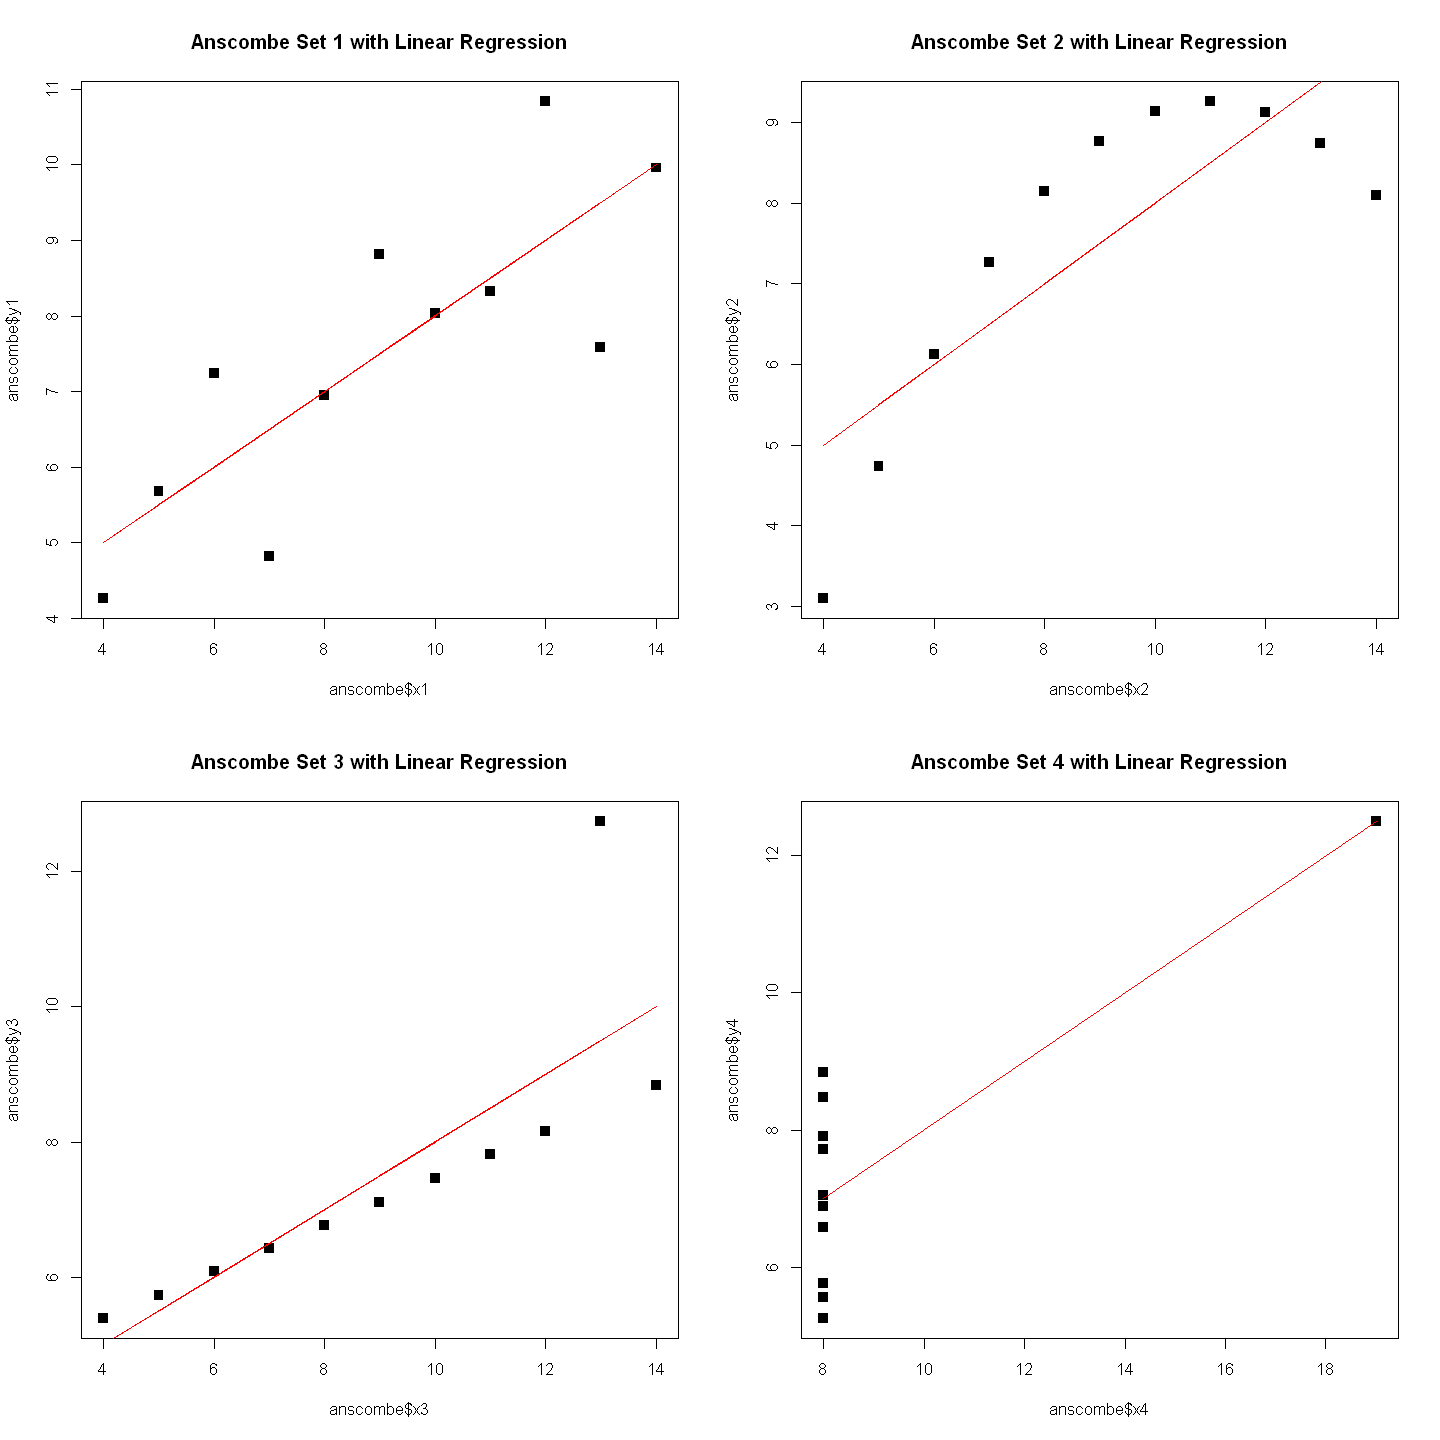

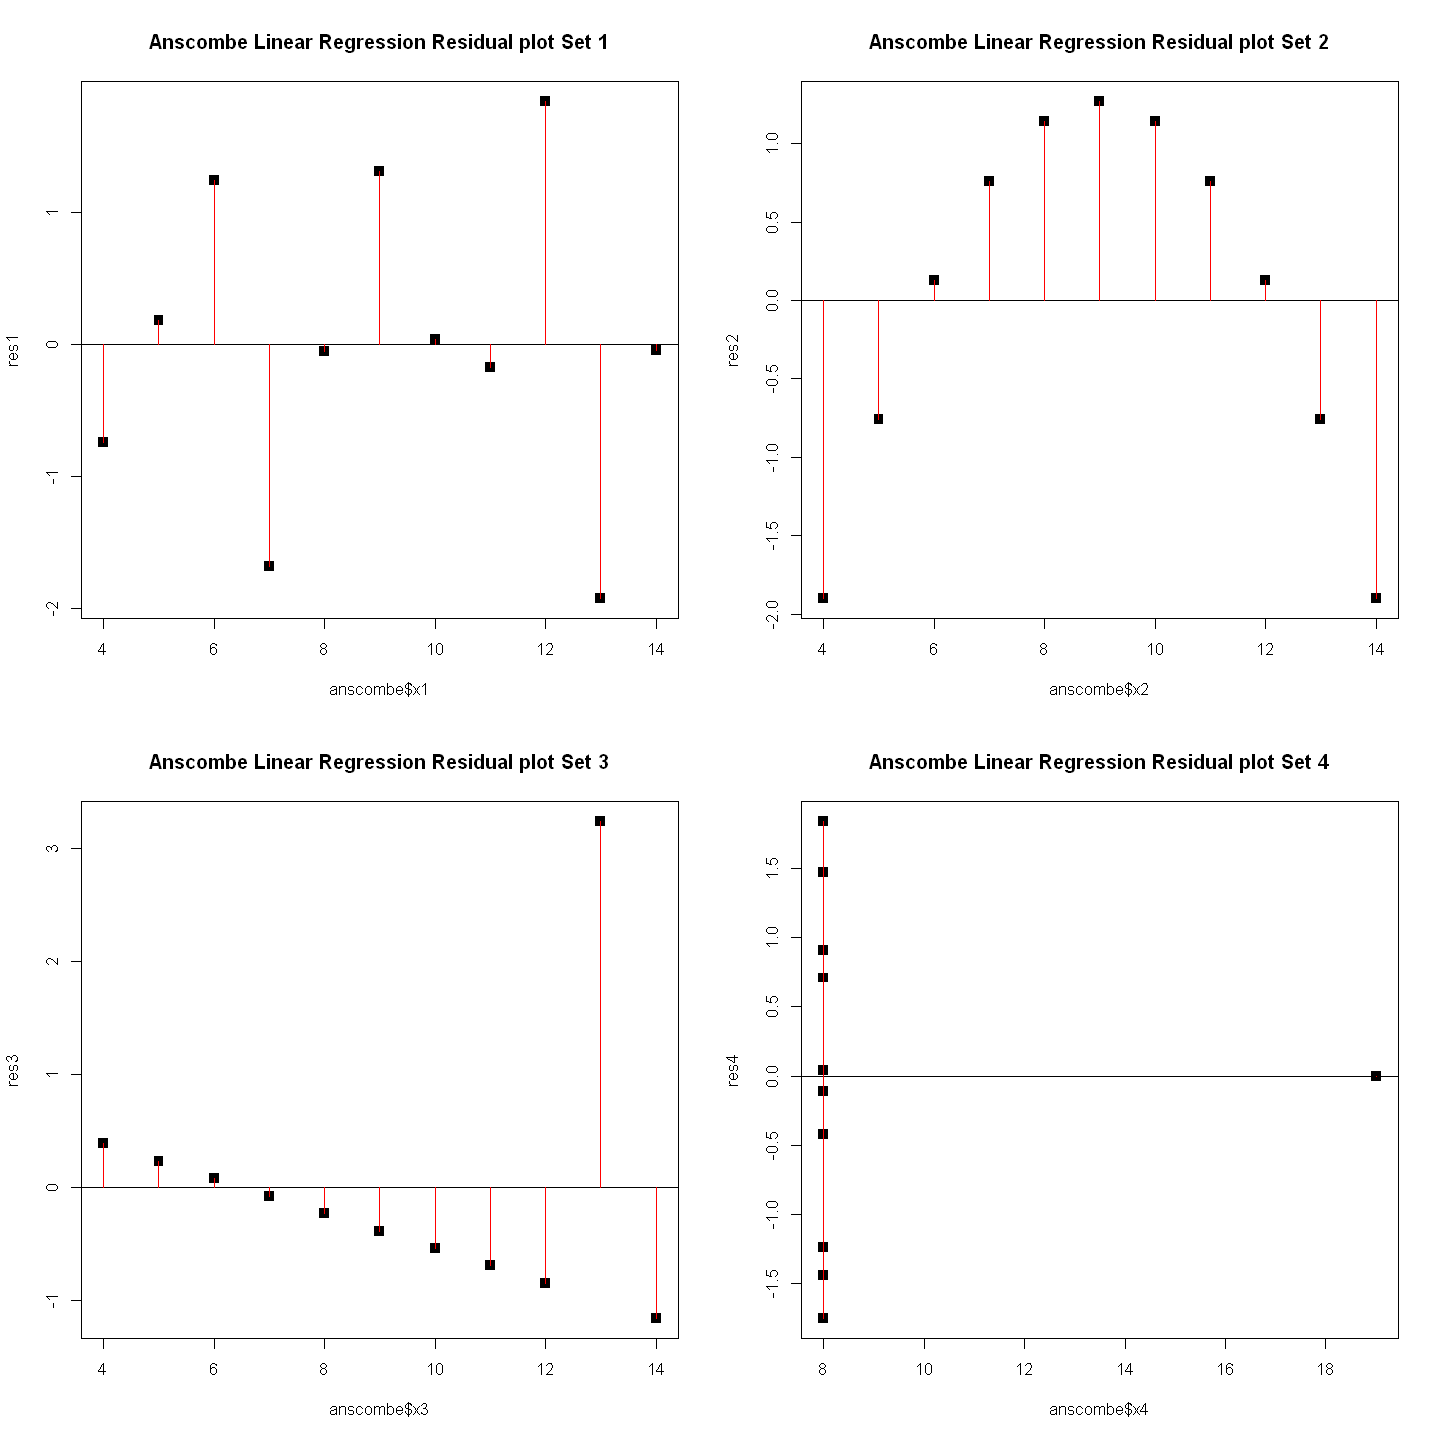

In [49]:
options(repr.plot.width = 12, repr.plot.height = 12)
anscombe = read.table("anscombe.txt",header = TRUE)

lin1 = lm(y1 ~ x1, data = anscombe)
lin2 = lm(y2 ~ x2, data = anscombe)
lin3 = lm(y3 ~ x3, data = anscombe)
lin4 = lm(y4 ~ x4, data = anscombe)
summary(lin1)$coefficients
summary(lin2)$coefficients
summary(lin3)$coefficients
summary(lin4)$coefficients

f1 = anscombe$x1*0.5+3
f2 = anscombe$x2*0.5+3
f3 = anscombe$x3*0.5+3
f4 = anscombe$x4*0.5+3

par(mfrow=c(2,2))
plot(anscombe$x1,anscombe$y1,cex = 10,pch = ".",main = 'Anscombe Set 1 with Linear Regression')
lines(anscombe$x1,f1,col = "red")
plot(anscombe$x2,anscombe$y2,cex = 10,pch = ".",main = 'Anscombe Set 2 with Linear Regression')
lines(anscombe$x2,f2,col = "red")
plot(anscombe$x3,anscombe$y3,cex = 10,pch = ".",main = 'Anscombe Set 3 with Linear Regression')
lines(anscombe$x3,f3,col = "red")
plot(anscombe$x4,anscombe$y4,cex = 10,pch = ".",main = 'Anscombe Set 4 with Linear Regression')
lines(anscombe$x4,f4,col = "red")

par(mfrow=c(2,2))
res1 = resid(lin1)
plot(anscombe$x1,res1,cex = 10,pch = ".",main = 'Anscombe Linear Regression Residual plot Set 1')
abline(0,0)
for (k in 1:length(anscombe$x1)){
    lines(c(anscombe$x1[k],anscombe$x1[k]),c(0,res1[k]),col = "red")
}
res2 = resid(lin2)
plot(anscombe$x2,res2,cex = 10,pch = ".",main = 'Anscombe Linear Regression Residual plot Set 2')
abline(0,0)
for (k in 1:length(anscombe$x1)){
    lines(c(anscombe$x2[k],anscombe$x2[k]),c(0,res2[k]),col = "red")
}
res3 = resid(lin3)
plot(anscombe$x3,res3,cex = 10,pch = ".",main = 'Anscombe Linear Regression Residual plot Set 3')
abline(0,0)
for (k in 1:length(anscombe$x1)){
    lines(c(anscombe$x3[k],anscombe$x3[k]),c(0,res3[k]),col = "red")
}
res4 = resid(lin4)
plot(anscombe$x4,res4,cex = 10,pch = ".",main = 'Anscombe Linear Regression Residual plot Set 4')
abline(0,0)
for (k in 1:length(anscombe$x1)){
    lines(c(anscombe$x4[k],anscombe$x4[k]),c(0,res4[k]),col = "red")
}

The Anscombe datasets are distinct and of unrelated form but are designed to have the same linear regression function. For all 4 datasets the linear regression models produced the function ypred = x*0.5 + 3 with the same p-values and standard error. However, scatter plots of the datasets shows completely different patterns between them. While the first dataset is an appropriate dataset for linear regression with variability but high correlation between x and y, this is not the case for the other dataset. This is all the more apparent when visualizing the residuals, which are only randomly distributed for dataset 1. 

Dataset 2 has residuals forming a parabolic pattern indicating that a 2nd order polynomial regression would be more appropriate for modeling that dataset. 

Dataset 3 shows a linear relationship that is overestimated as x increases due to an outlier in the y-direction. Removal of that outlier would improve the ability of the model to accurately model the rest of the dataset. 

Dataset 4 has high residuals normally distributed about the same x, and an outlier in the x-direction. Removal of this outlier would reduce the residuals of the model, however, a linear model is also inappropriate for this dataset as there is no true relationship between the x and y variable. 